In [1]:
import yfinance as yf

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas_datareader as web

In [6]:
import statsmodels.api as sm

In [7]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

In [8]:
stock = 'nvda'

short_moving_average_span = 20
long_moving_average_span = 50
cutoff=0.50
invest = 100
years_of_data_to_process = 25

In [9]:
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
print (date)
year = date.strftime("%Y")
start_year =  int(year) - years_of_data_to_process
start = datetime.datetime(start_year, 1, 1)

2021-06-25


In [10]:
data =  yf.download(stock, start=start)

[*********************100%***********************]  1 of 1 completed


In [11]:
#data = web.DataReader(stock, data_source='yahoo', start = start, end = '2008-7-14')

In [12]:
df = data["Close"].pct_change() * 100

In [13]:
df = df.rename("Today_Change_%")
df = df.reset_index()

In [14]:
df1 = pd.merge(data,df, on="Date")
#df1

In [15]:
df1.insert(7,'Volume_Lag', None)
df1['Volume_Lag'] = df1.Volume.shift(1).values/1000000000
df1.Volume = df1.Volume/1000000000

In [16]:
df1["Trend"] =  (df1["Close"] - df1["Low"])/ ((df1["High"] - df1["Low"]))

In [17]:
df1["Trend_Lag"] = df1["Trend"].shift(1)

In [18]:
df1['Close-Open'] =  df1['Close'] - df1['Open']
df1['Close-Open_Lag'] = df1['Close-Open'].shift(1)

In [19]:
df1['High-Low'] =  df1['High'] - df1['Low']
df1['High-Low_Lag'] = df1['High-Low'].shift(1)

In [20]:
df1 = sm.add_constant(df1)
df1["Up_Down"] = [1 if (i > 0) else 0 for i in df1["Today_Change_%"]]

In [21]:
df1.dropna(inplace= True)

In [22]:
df1['Short_MV_Avg_Span'] = df1['Close'].ewm(span=short_moving_average_span, adjust=False).mean()
df1.dropna(inplace= True)
#df1

In [23]:
df1['Long_MV_Avg_Span'] = df1['Close'].ewm(span=long_moving_average_span, adjust=False).mean()
df1.dropna(inplace= True)
#df1

In [24]:
df1['Short_MV_Avg_Span-Long_MV_Avg_Span'] = df1.Short_MV_Avg_Span - df1.Long_MV_Avg_Span
df1['Short_MV_Avg_Span-Long_MV_Avg_Span_Lag'] = df1['Short_MV_Avg_Span-Long_MV_Avg_Span'].shift(1)
#df1

In [25]:
#crossovers = pd.DataFrame()
#crossovers['Dates'] = Short_MV_Avg_Span['Date']
#crossovers['Price'] = [i for i in df1.Close]
#crossovers['Short_MV_Avg_Span'] = Short_MV_Avg_Span['Close']
#crossovers['Long_MV_Avg_Span'] = Long_MV_Avg_Span['Close']
#crossovers

In [26]:
df1.dropna(inplace= True)
df1

,const,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Lag,Today_Change_%,...,Trend_Lag,Close-Open,Close-Open_Lag,High-Low,High-Low_Lag,Up_Down,Short_MV_Avg_Span,Long_MV_Avg_Span,Short_MV_Avg_Span-Long_MV_Avg_Span,Short_MV_Avg_Span-Long_MV_Avg_Span_Lag
2,1.0,1999-01-26,1.833333,1.869792,1.645833,1.671875,1.536261,0.008580,0.012762,-7.758621,...,0.891893,-0.161458,0.041667,0.223959,0.192708,0,1.799107,1.806985,-0.007878,0.000000
3,1.0,1999-01-27,1.677083,1.718750,1.583333,1.666667,1.531475,0.006109,0.008580,-0.311507,...,0.116280,-0.010416,-0.161458,0.135417,0.223959,0,1.786494,1.801483,-0.014989,-0.007878
4,1.0,1999-01-28,1.666667,1.677083,1.651042,1.661458,1.526689,0.005688,0.006109,-0.312538,...,0.615388,-0.005209,-0.010416,0.026041,0.135417,0,1.774586,1.795991,-0.021406,-0.014989
5,1.0,1999-01-29,1.661458,1.666667,1.583333,1.583333,1.454901,0.006101,0.005688,-4.702195,...,0.399985,-0.078125,-0.005209,0.083334,0.026041,0,1.756371,1.787652,-0.031281,-0.021406
6,1.0,1999-02-01,1.583333,1.625000,1.583333,1.614583,1.483616,0.003868,0.006101,1.973685,...,0.000000,0.031250,-0.078125,0.041667,0.083334,1,1.742867,1.780865,-0.037997,-0.031281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,1.0,2021-06-21,737.409973,741.460022,712.909973,737.090027,737.090027,0.016810,0.024192,-1.134728,...,0.069216,-0.319946,-5.809998,28.550049,31.640015,0,689.353708,640.135402,49.218306,48.150761
5641,1.0,2021-06-22,738.859985,758.549988,735.440002,755.469971,755.469971,0.014504,0.016810,2.493582,...,0.846936,16.609985,-0.319946,23.109985,28.550049,1,695.650495,644.658327,50.992168,49.218306
5642,1.0,2021-06-23,760.309998,766.109985,756.309998,762.289978,762.289978,0.008309,0.014504,0.902750,...,0.866724,1.979980,16.609985,9.799988,23.109985,1,701.997112,649.271333,52.725780,50.992168
5643,1.0,2021-06-24,769.109985,776.799988,763.530029,768.219971,768.219971,0.008013,0.008309,0.777918,...,0.610203,-0.890015,1.979980,13.269958,9.799988,1,708.304051,653.935985,54.368066,52.725780


In [27]:
X = df1[['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]

<function matplotlib.pyplot.show(close=None, block=None)>

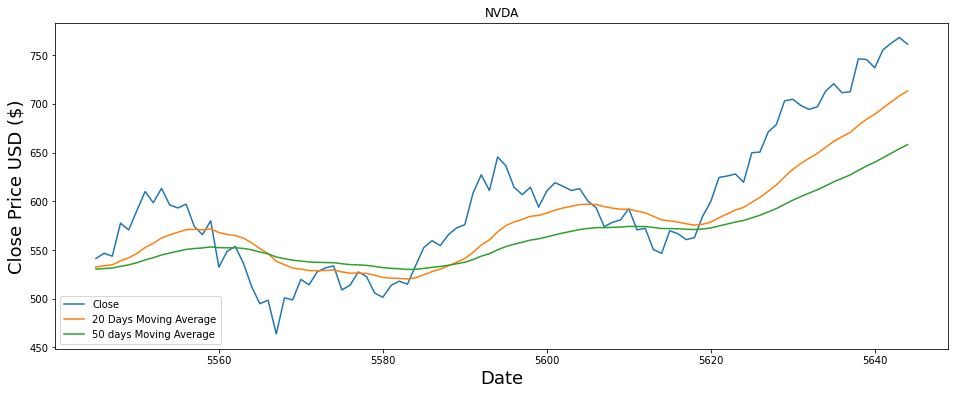

In [28]:
df1['Close'][-100:].plot(figsize=(16,6))
df1['Short_MV_Avg_Span'][-100:].plot(figsize=(16,6))
df1['Long_MV_Avg_Span'][-100:].plot(figsize=(16,6))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.legend(['Close', str(short_moving_average_span) + ' Days Moving Average', str(long_moving_average_span) + ' days Moving Average'], loc = 'lower left')
plt.title(stock.upper())
plt.show

In [29]:
y = df1["Up_Down"].values

In [30]:
model = sm.Logit(y,X)

In [31]:
result =  model.fit()

Optimization terminated successfully.
         Current function value: 0.691062
         Iterations 4


In [32]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5641
Model:                          Logit   Df Residuals:                     5635
Method:                           MLE   Df Model:                            5
Date:                Fri, 25 Jun 2021   Pseudo R-squ.:                0.002507
Time:                        17:04:49   Log-Likelihood:                -3898.3
converged:                       True   LL-Null:                       -3908.1
Covariance Type:            nonrobust   LLR p-value:                  0.001490
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.1582      0.068      2.337      0.019       0.026       0.291
Trend_Lag                                 -0.1460      0.095     -1.538      0.124      -0.332       0.040
Short_MV_Avg_Span-Long_MV_Avg_Span_Lag     0.0023      0.005      0.480      0.632      -0.007       0.012
Close-Open_Lag                            -0.0184      0.009     -1.981      0.048      -0.037      -0.000
High-Low_Lag                               0.0124      0.007      1.842      0.065      -0.001       0.026
Volume_Lag                                -4.0300      2.385     -1.690      0.091      -8.704       0.644
==========================================================================================================
"""

In [33]:
prediction = result.predict(X)

In [34]:
df1['Prediction_Caculated'] = pd.array(prediction)
df1['Prediction_indicator'] = pd.array([1 if i > cutoff else 0 for i in prediction])
#print (df1.iloc[-1,18],df1.iloc[-1,19],df1.iloc[-1,20])

In [35]:
#print(df1.loc[[i for i in range(len(df1)-20, len(df1)+2)],['Trend_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag', 'Up_Down', 'Prediction_indicator']])

In [36]:
y = df1["Up_Down"].values

In [37]:
def confusion_matrix(act,pred):
    predtrans = ['Up' if i > cutoff else 'Down' for i in pred]
    actuals = ['Up' if i > 0 else 'Down' for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals),
                                   pd.Series(predtrans),
                                   rownames = ["Actual"],
                                   colnames = ["Predict"]
                                  )
    return confusion_matrix

In [38]:
confusion_matrix(y,prediction)

Predict,Down,Up
Actual,,
Down,853,1893
Up,819,2076


In [39]:
z = confusion_matrix(y,prediction)
try:
    print((z.loc['Down','Down'] + z.loc['Up','Up']) / len(df1))
except:
    pass

0.5192341783371742


In [40]:
try:
    print( (z.loc['Down', 'Down']+ z.loc['Up','Up']) / (z.loc['Down', 'Down']+ z.loc['Up','Up'] + z.loc['Down','Up']) )
except:
    pass

0.6074243052675239


In [41]:
df1 = df1.assign(share=np.nan,money=np.nan)
#df1

In [42]:
diff_years = round((df1.iloc[-1,1] - df1.iloc[0,1])/np.timedelta64(1,'Y') + 0.5)   

In [43]:
#Simulate Investment transaction buy on opening when predict UP and sell daily average when predict DOWN

def buy_sell(open_price, sell_price,prediction, money, share):
    if prediction == 1 and money != 0:
        share =  money / open_price
        money = 0
    elif prediction == 0 and share != 0:
        money = share * sell_price
        share = 0
    else: pass
    return [money, share]
money = invest
share = 0
for i in range(len(df1)):
    [money, share] = buy_sell(df1.iloc[i,2],(df1.iloc[i,3]+df1.iloc[i,4])/2,df1.iloc[i,22], money, share)
    df1.iloc[i,23] = share
    df1.iloc[i,24] = money

In [44]:
#df1.tail(10)

In [45]:
print("\nIf ${:,.2f} was invested in [ {} ], and Just Hold and Not Trade for {:,} years, the ROI = ${:,.2f}".format( invest, stock.upper(), diff_years, invest/data.iloc[0, 0] * data.iloc[-1,0]))


If $100.00 was invested in [ NVDA ], and Just Hold and Not Trade for 23 years, the ROI = $44,069.71


In [46]:
print ("\nIf ${:,.2f} was invested {:2d} years ago, buy and sell according this script\'s recommandation, the ROI = ${:,.2f}".format(invest, diff_years, (money + (share * df1.iloc[-1,6]))))


If $100.00 was invested 23 years ago, buy and sell according this script's recommandation, the ROI = $478,443.72


In [47]:
df1_summary=df1[['Date', 'Up_Down','Prediction_indicator']].copy()
df1_summary['Stock Market Performance'] = df1_summary['Up_Down'].apply(lambda x: 'Up' if x > 0 else 'Down')
df1_summary['Scribe Predection'] = df1_summary['Prediction_indicator'].apply(lambda x: 'Up' if x > 0 else 'Down')
print (df1_summary[['Date','Stock Market Performance','Scribe Predection']].tail(15))

           Date Stock Market Performance Scribe Predection
5630 2021-06-07                       Up              Down
5631 2021-06-08                     Down                Up
5632 2021-06-09                     Down                Up
5633 2021-06-10                       Up                Up
5634 2021-06-11                       Up                Up
5635 2021-06-14                       Up                Up
5636 2021-06-15                     Down                Up
5637 2021-06-16                       Up                Up
5638 2021-06-17                       Up                Up
5639 2021-06-18                     Down              Down
5640 2021-06-21                     Down                Up
5641 2021-06-22                       Up                Up
5642 2021-06-23                       Up                Up
5643 2021-06-24                       Up                Up
5644 2021-06-25                     Down                Up


In [48]:
#print(df1.loc[[i for i in range(len(df1)-20, len(df1)+2)],['Date','Close','Trend_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag']])

In [49]:
#print(df1.iloc[len(df1)-1,[1,7,10,11,12,13,14,15,16,17,18,19,20,21,22]])
#df1.info()

In [50]:
print ("\nToday [ %s ] actually went up," %stock.upper(), end = ' ') if (df1.iloc[-1,16] == 1) else print ("\nToday [ %s ] actually went down," %stock.upper(), end = " ")
print ("--- base on yesterday\'s data, ", end = '')
print ("We Predication [ %s ] should be going up." %stock.upper()) if (df1.iloc[-1,22] == 1) else print ("We Predicae [ %s ] should be going down." %stock.upper())
print ("\n=========> Actual and Predication MATCH <=========") if (df1.iloc[-1,16] == df1.iloc[-1,22]) else print("\n=========> Actual and Predication DO NOT match <=========")


Today [ NVDA ] actually went down, --- base on yesterday's data, We Predication [ NVDA ] should be going up.

=========> Actual and Predication DO NOT match <=========


In [51]:
x_tran= df1[df1.Date.dt.year < 2021][['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]
y_train=df1[df1.Date.dt.year < 2021]["Up_Down"]
x_test= df1[df1.Date.dt.year >= 2021][['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]
y_test= df1[df1.Date.dt.year >= 2021]["Up_Down"]

In [52]:
model = sm.Logit(y_train,x_tran)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.691245
         Iterations 4


In [53]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Up_Down   No. Observations:                 5520
Model:                          Logit   Df Residuals:                     5514
Method:                           MLE   Df Model:                            5
Date:                Fri, 25 Jun 2021   Pseudo R-squ.:                0.002320
Time:                        17:04:51   Log-Likelihood:                -3815.7
converged:                       True   LL-Null:                       -3824.5
Covariance Type:            nonrobust   LLR p-value:                  0.003278
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.1584      0.068      2.322      0.020       0.025       0.292
Trend_Lag                                 -0.1438      0.096     -1.492      0.136      -0.333       0.045
Short_MV_Avg_Span-Long_MV_Avg_Span_Lag     0.0041      0.005      0.754      0.451      -0.006       0.015
Close-Open_Lag                            -0.0210      0.011     -1.829      0.067      -0.044       0.002
High-Low_Lag                               0.0117      0.008      1.403      0.161      -0.005       0.028
Volume_Lag                                -4.1255      2.403     -1.717      0.086      -8.835       0.584
==========================================================================================================
"""

In [54]:
#print(result.summary().as_csv())

In [55]:
#summary_list=result.summary().as_csv().split(",")

In [56]:
#print(summary_list)

In [57]:
print(summary_list[37:39])

['   -1.492', ' 0.136']


In [58]:
prediction = result.predict(x_test)
confusion_matrix(y_test, prediction)

Predict,Down,Up
Actual,,
Down,11,42
Up,14,54


In [59]:
z = confusion_matrix(y_test,prediction)

In [60]:
try:
    print ("\n=========> Prediction Accuracy Rate: %.4f <=========\n"  %((z.loc['Down','Down'] + z.loc['Up','Up']) / len(x_test)))
except:
    print ("\n=========> Predication effectiveness is not avairable <=========\n" )


=========> Prediction Accuracy Rate: 0.5372 <=========



In [61]:
prediction = result.predict(x_test)
now_up_down  = result.predict([1.0, df1.iloc[-1, 10], df1.iloc[-1, 19], df1.iloc[-1, 12], df1.iloc[-1, 14], df1.iloc[-1, 7]])
print ("\n=========> Current trend = %.4f,  " %now_up_down, end=' ')
print ("[ %s ] will go up! <=========" %stock.upper()) if now_up_down > cutoff else print ("[ %s ] will go down! <=========" %stock.upper()) 


=========> Current trend = 0.6751,   [ NVDA ] will go up! <=========


In [62]:
#print ("\n=========> Current trend = %.4f,  " %now_up_down, end=' ')
print ("\n ============> %s Days over %s Days Moving Average Indicator \n ============> %.4f....%.4f....%.4f....%.4f....%.4f....<=============" %(short_moving_average_span, long_moving_average_span, df1.iloc[-5,19], df1.iloc[-4,19], df1.iloc[-3,19], df1.iloc[-2,19],df1.iloc[-1,19]))
if df1.iloc[-1,19] * df1.iloc[-2,19] < 0:
    print ("\n ============> Warning, It Is the Time to Sell [ %s ] <=========" %stock.upper()) if df1.iloc[-1,19] < 0 else print ("\n ============> It Is the Time to Buy [ %s ] ! <=========" %stock.upper())
else:
    print ("\n ============> No Trading Waring at this time! <=============")


 ============> 20 Days over 50 Days Moving Average Indicator 
 ============> 49.2183....50.9922....52.7258....54.3681....55.2016....<=============

 ============> No Trading Waring at this time! <=============


In [63]:
#df1.to_csv('fb.csv', index = False)